---

# Lecture 8.2 Boosting 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_9/Lecture_9_2.ipynb)

**Boosting** is an ensemble method that trains predictors sequentially, each trying to correct the errors made by the previous predictor. In this lecture we consider two well known boosting methods, namely **AdaBoost** and **gradient boosting**. 

## AdaBoost
With **AdaBoost**, the training algorithm first trains a base classifier and uses it to make predictions on the training set. Then, each of the missclassified training instances is then given a *relative weight*. The next classifier is then trained on the dataset using these relative weights, and so on. 

The idea is that whenever a classifier missclassifies a data point,this data point is then *boosted* to signal difficulty in classification. 


---

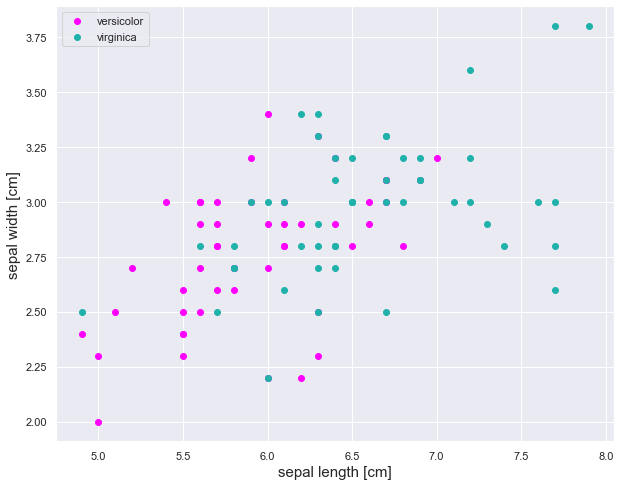

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
iris = sns.load_dataset("iris")
iris = iris.iloc[50:]

X = iris[["sepal_length", "sepal_width"]].to_numpy()

# Define labeling function
def make_labels(y):
    if y == "versicolor":
        return 0
    else:
        return 1
    
        
# Create target value array
y = iris["species"].map(make_labels).to_numpy()

# Plot the data
flowers = ["versicolor", "virginica"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(flowers, colors):
    temp_df = iris[iris.species == species]
    ax.scatter(temp_df.sepal_length,
               temp_df.sepal_width,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("sepal length [cm]", fontsize = 15)
ax.set_ylabel("sepal width [cm]", fontsize = 15)
ax.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"AdaBoost Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.68      0.76      0.72        17

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.76      0.75      0.75        40
 



---

As you will notice by running the following code cell, the decision regions generated by AdaBoost are distinctly different from those generated by the bagging and random forest algorithms. 


---

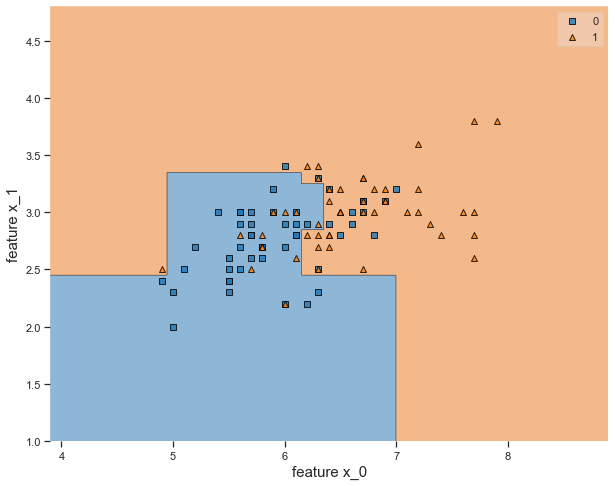

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = ada_clf)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [8]:
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 10,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, ada_y_pred), "\n")


Tree Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.88      0.82      0.85        17

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40
 



---

## Gradient Boosting 
Another popular boosting method is **gradient boosting**. This method works by sequentially adding predictors to an ensemble, each correcting is predecessor. The difference between this method and AdaBoost is that gradient boosting tries to fit the new predictor to the *residual errors* made by the previous predictor. Recall the residual error denoted by $error$. 

Given features ```X``` and regression values ```y```, we train a regression tree ```tree_reg1``` on this dat and then ```tree_reg1``` predicts a vector $\hat{y}_i$ of real values. Then, 

$$
y = \hat{y}_1 + error_1
$$

which implies, 
$$
y - \hat{y}_1 = error_1
$$

Next fit another regression tree, say ```tree_reg2```, with features ```X``` and labels $y_2 = y - \hat{y}1$. Then, ```tree_reg2``` predict a vector $\hat{y}_2$, with 

$$
error_1 = y_2 = \hat{y}_2 + error_2
$$

Thus, 

$$
y = \hat{y}_1 + error_1 = \hat{y}_1 + \hat{y}_2 + error_2, 
$$
where $error_1 > error_2$. This means that we have a better predictor by summing the predictions of ```tree_reg1``` and ```tree_reg2```!


In the following code cells we generate artifical quadratic data and then perform gradient boost with three regression trees. 

---

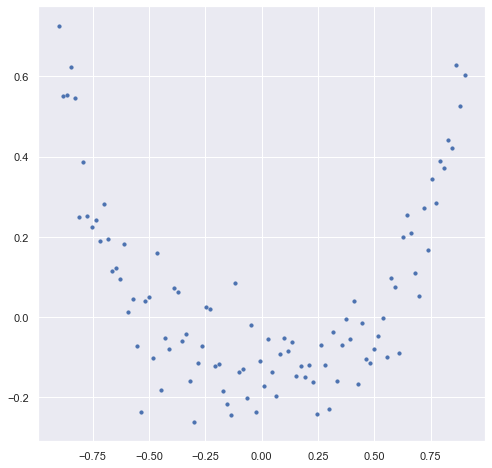

In [81]:
np.random.seed(0)
X = np.linspace(-.9, .9, 100)
y = (X ** 4) + np.random.normal(-.09, .09, 100)
plt.figure(figsize=(8, 8))
plt.scatter(X, y, s=10)
plt.show()

In [76]:
from sklearn.tree import DecisionTreeRegressor

X_new = X.reshape(-1, 1)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_new, y)

y2 = y - tree_reg1.predict(X_new)

tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_new, y2)

y3 = y2 - tree_reg2.predict(X_new)

tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_new, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [77]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

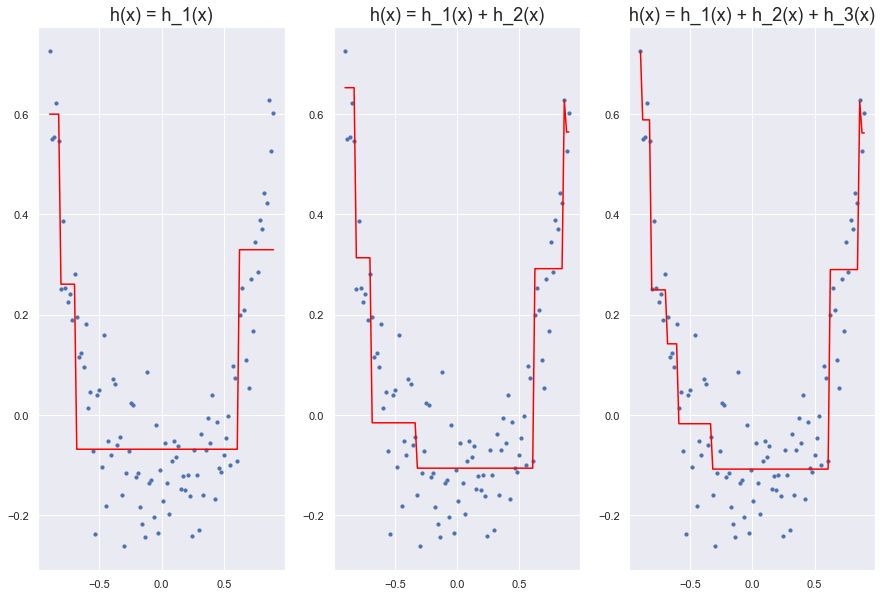

In [80]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X, y, s=10)
ax1.plot(X, tree_reg1.predict(X_new), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter(X, y, s=10)
ax2.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter(X, y, s=10)
ax3.plot(X, tree_reg1.predict(X_new)+tree_reg2.predict(X_new)+tree_reg3.predict(X_new), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()